# Analysis of Lennard Jones Fluid Simulations


### Sim with Velocity Verlet algorithm

### Changin cut of of the potential $r_c$

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [238]:
#data folder and files
data_folder = 'code_Lennard_Jones_fluid/output/'
files = os.listdir(data_folder)
files = sorted(files)

In [239]:
#Parameters
dt = 0.01
T = 1
N = 200

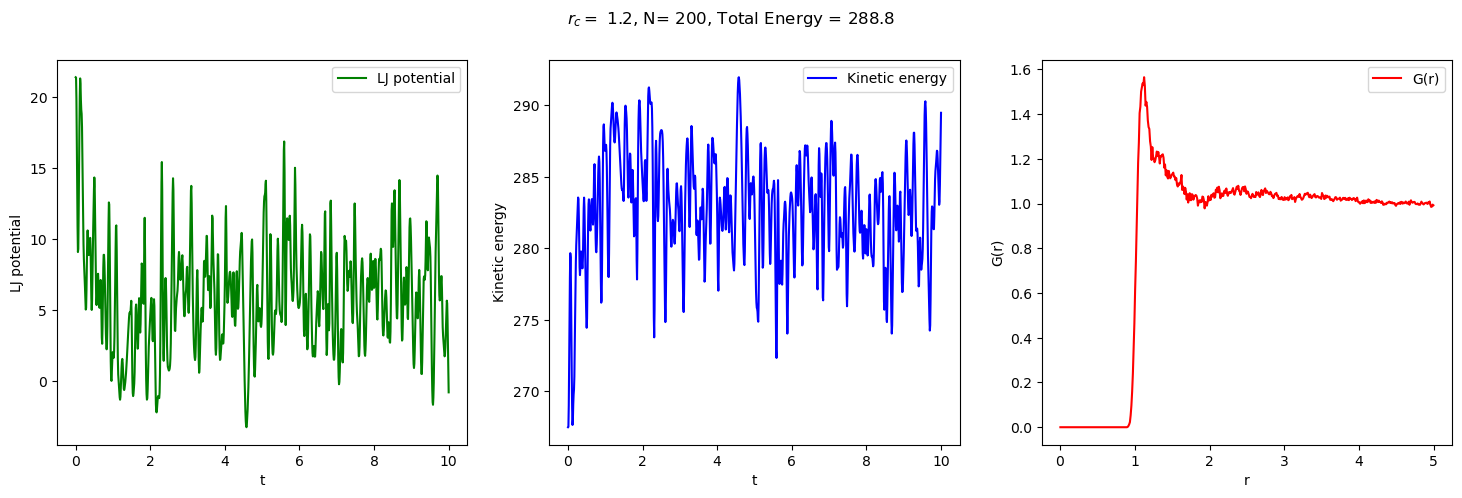

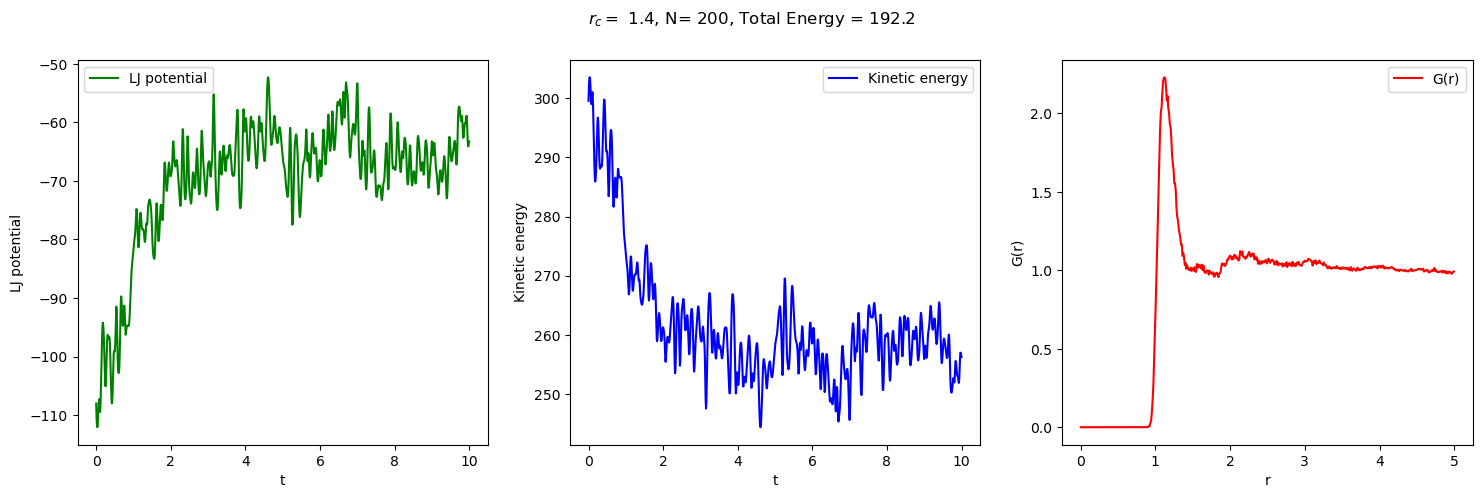

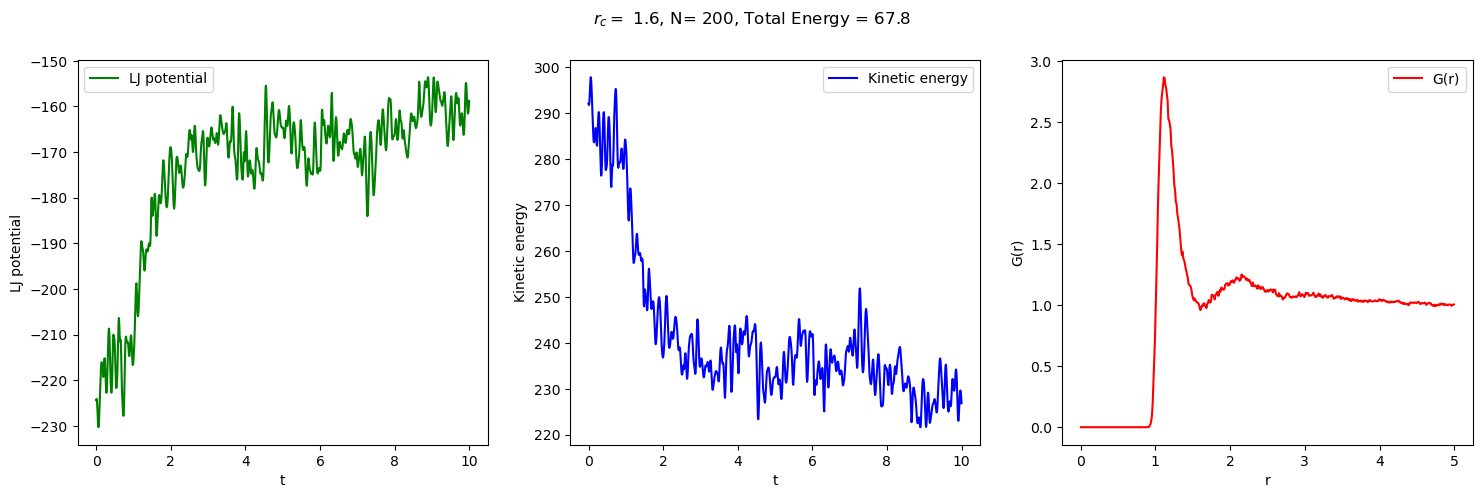

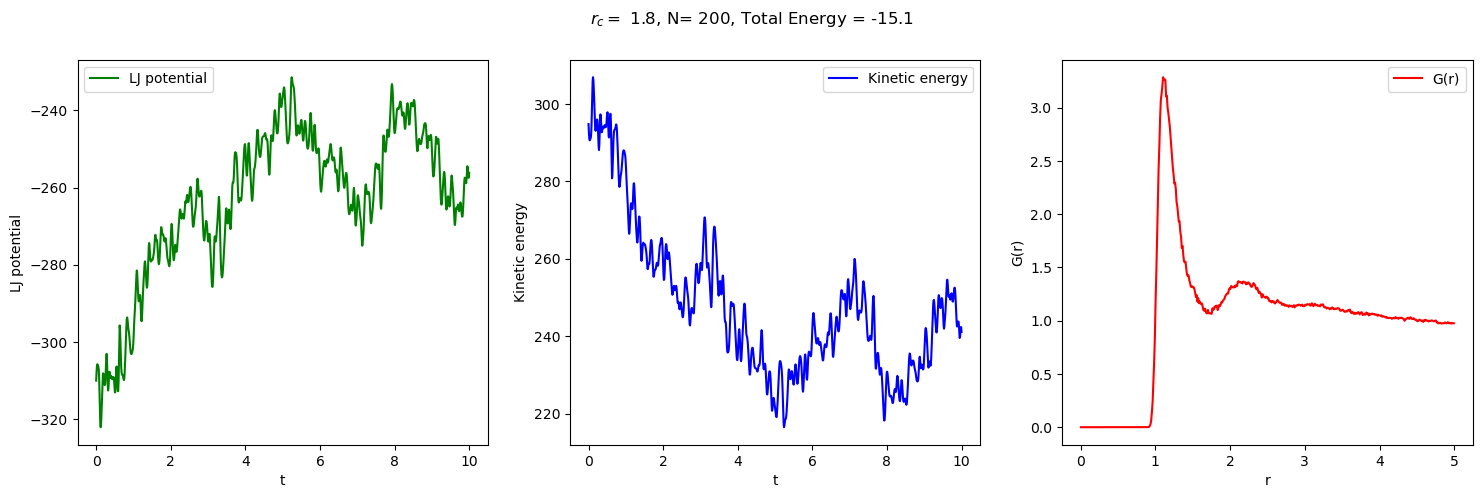

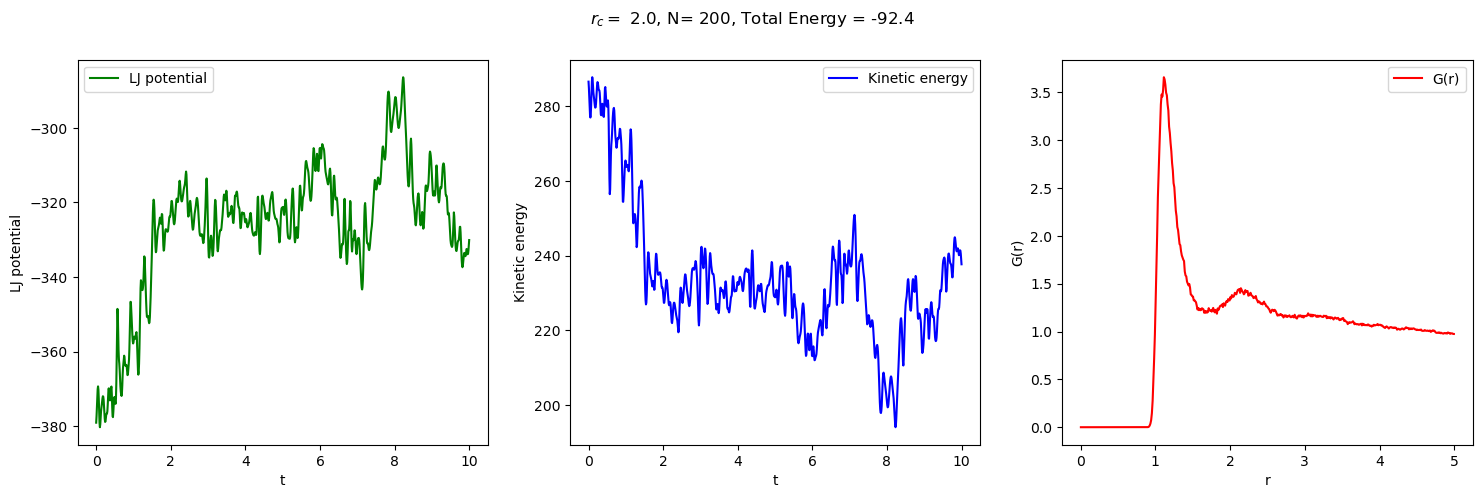

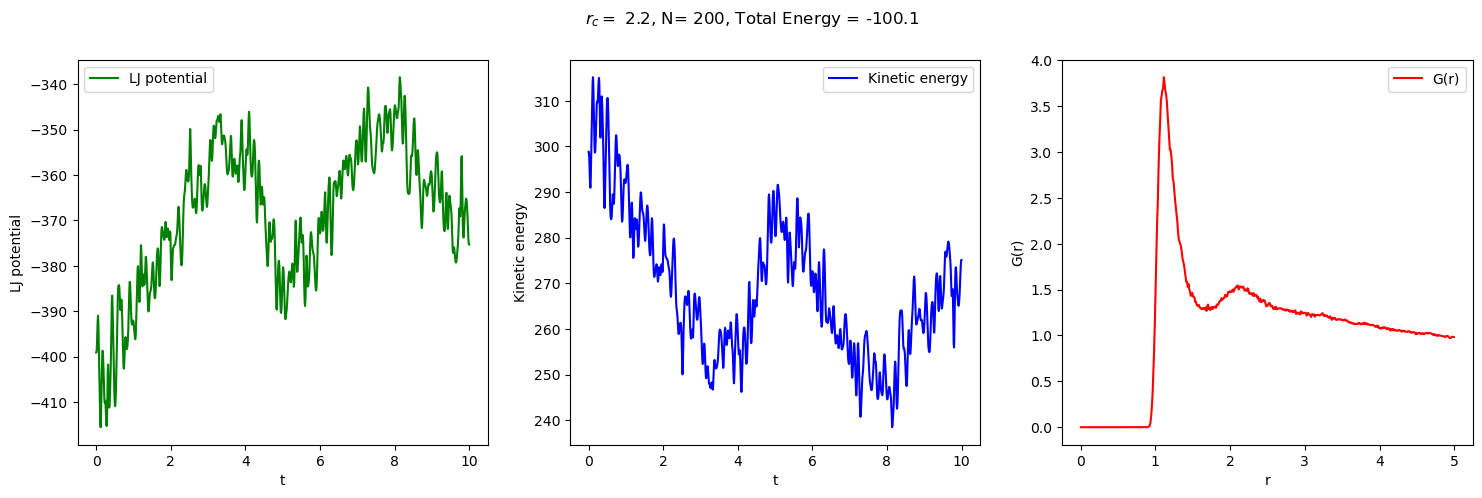

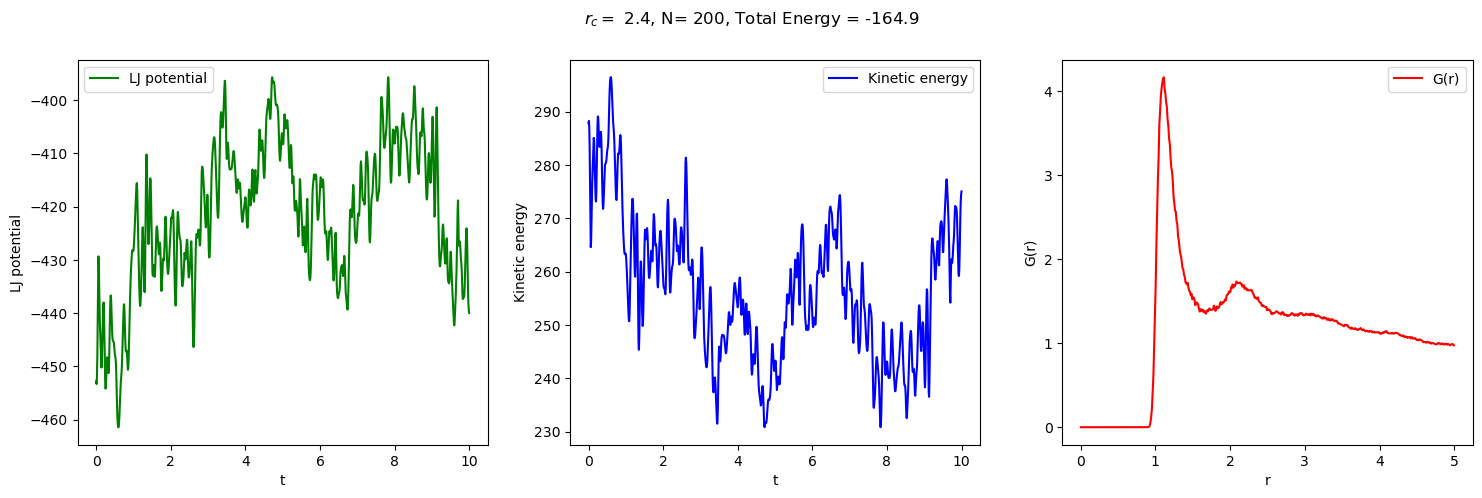

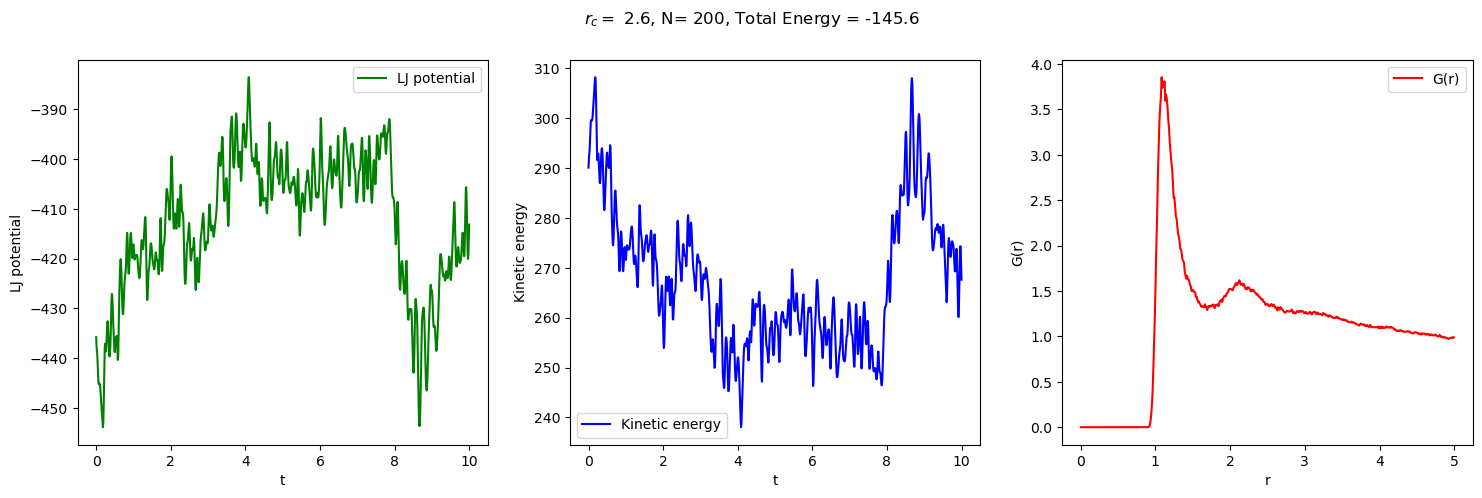

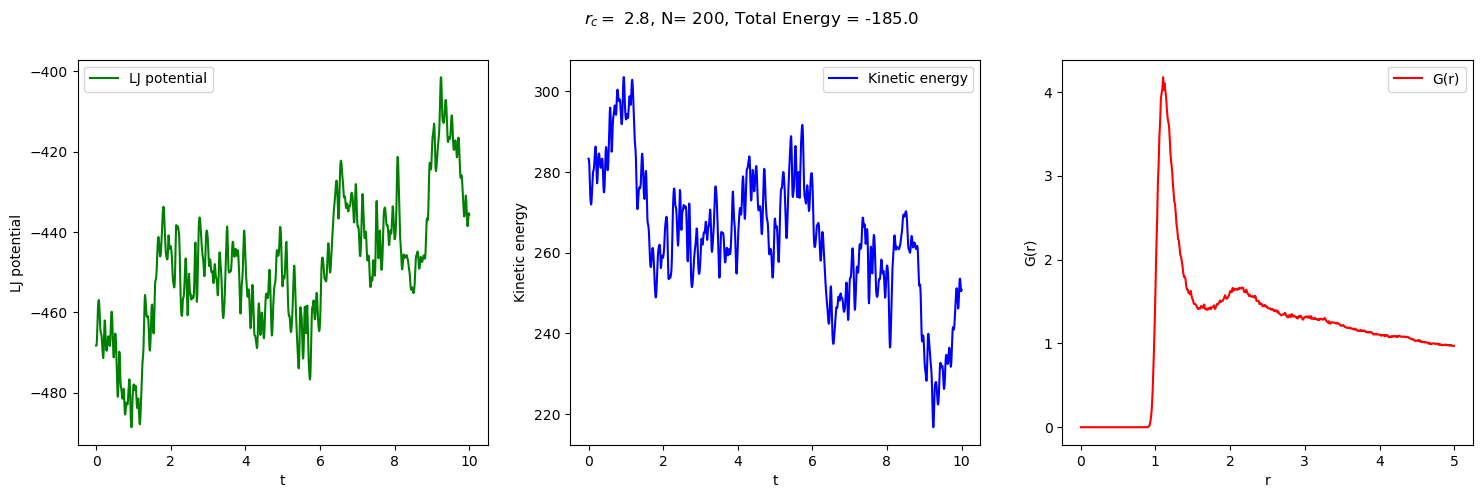

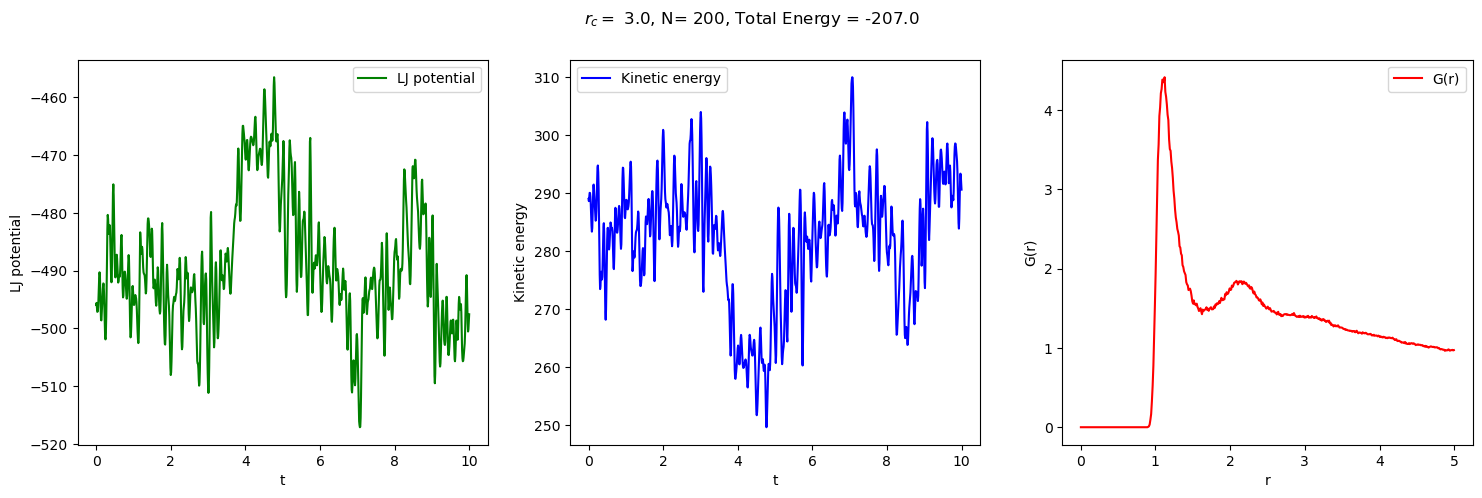

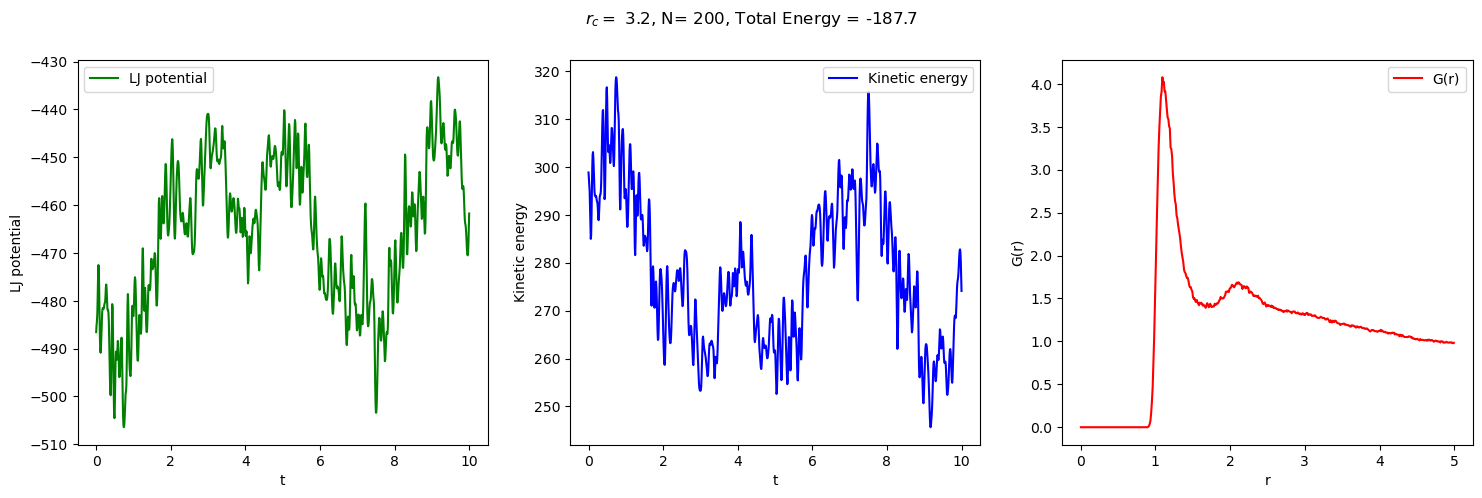

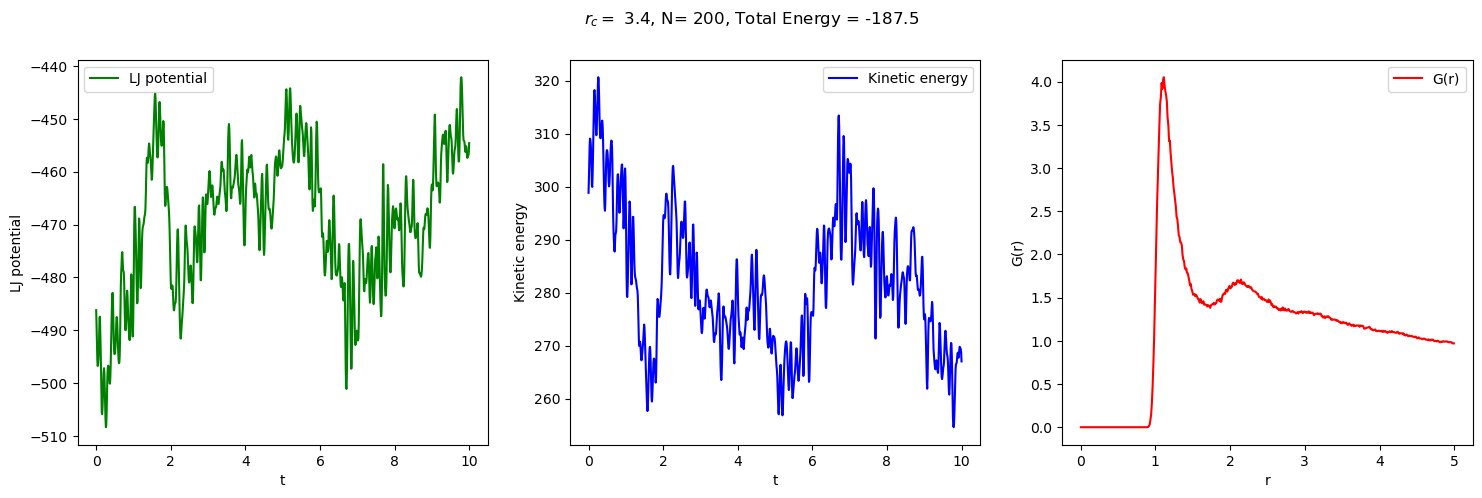

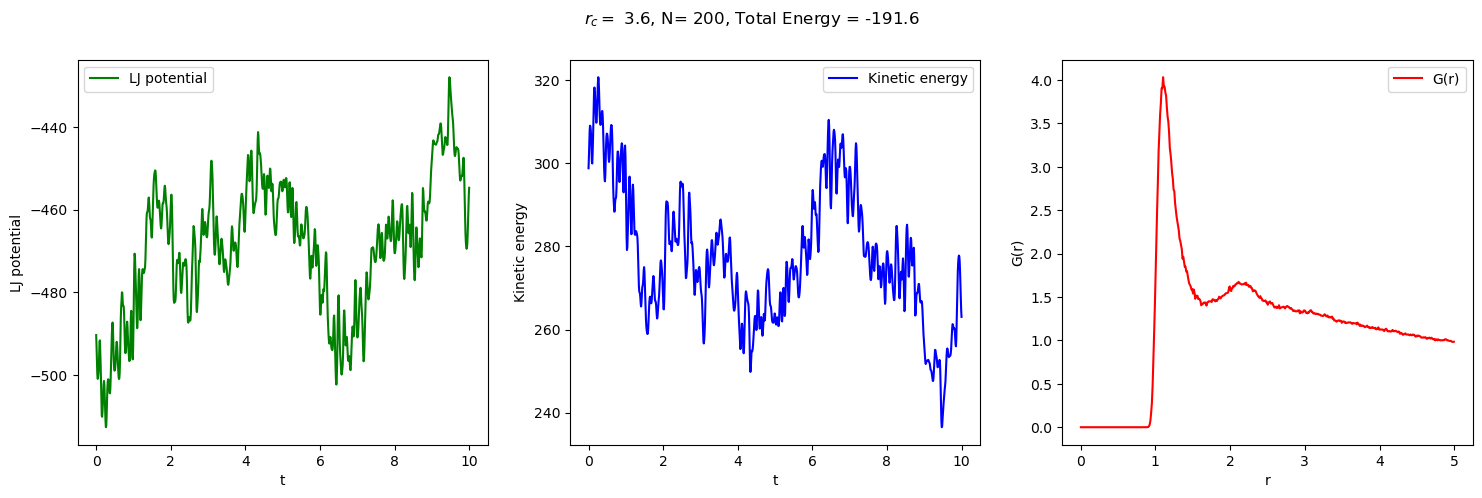

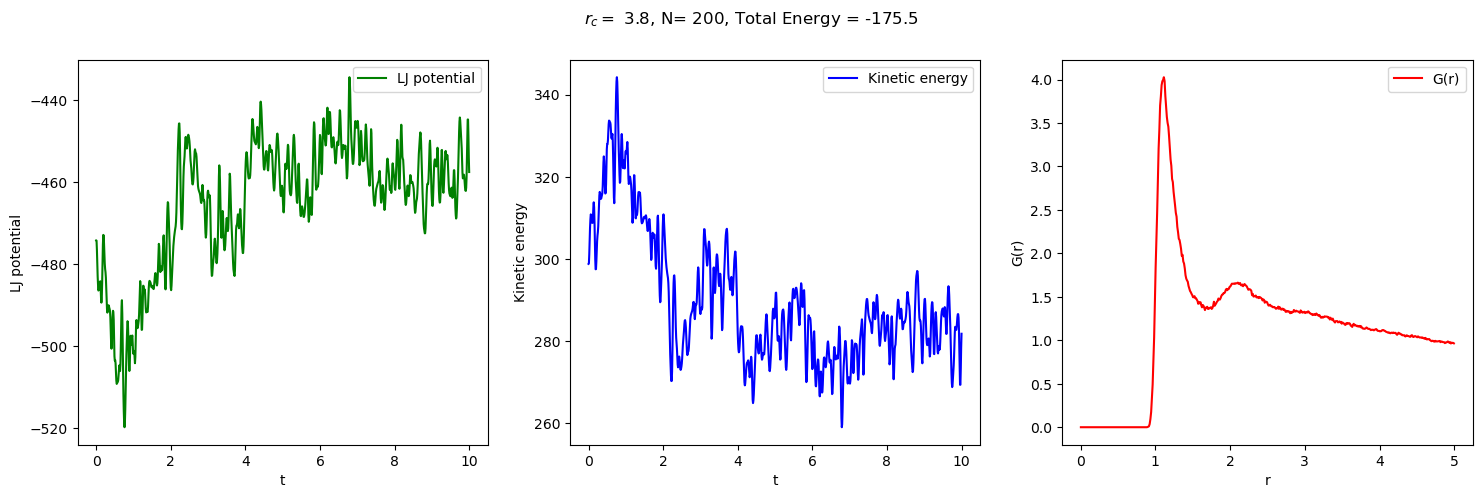

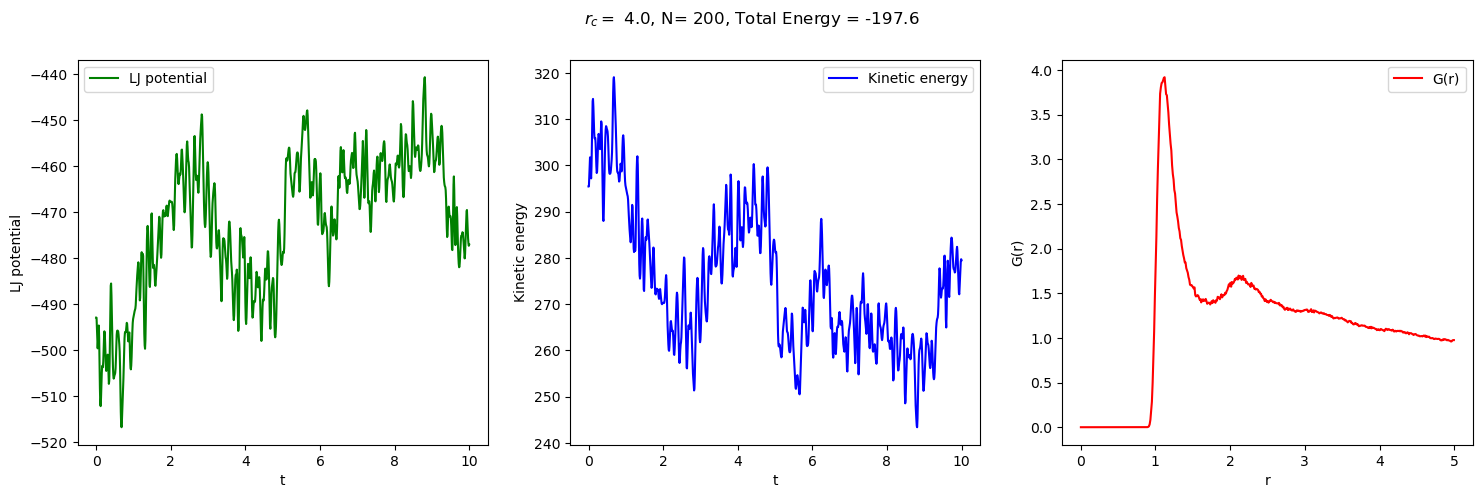

In [250]:
#Analysis
for i in range(len(files)//2):

    #selecting the file
    #print('Files:', i, '/', len(files)//2-1)
    file_GdR = files[i]
    file_energy = files[len(files)//2+i]

    #loading the data
    data_GdR = np.loadtxt(data_folder+file_GdR)
    data_energy = np.loadtxt(data_folder+file_energy)

    #extracting vlaue of Rc
    pattern_rc = r"rc_(.*?)_"
    rc = float(re.findall(pattern_rc, file_GdR)[0])

    #plotting data
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    #G(r)
    ax[2].plot(data_GdR[:, 0], data_GdR[:, 1], color = 'red', label=r'G(r)')
    ax[2].set_xlabel('r')
    ax[2].set_ylabel('G(r)')
    ax[2].legend()

    #LJ potential
    ax[0].plot(np.arange(len(data_energy[:, 0]))*dt, data_energy[:, 1], color = 'green', label=r'LJ potential')
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('LJ potential')
    ax[0].legend()

    #Kinetic energy
    ax[1].plot(np.arange(len(data_energy[:, 0]))*dt, data_energy[:, 2], color = 'blue', label=r'Kinetic energy')
    ax[1].set_xlabel('t')
    ax[1].set_ylabel('Kinetic energy')
    ax[1].legend()

    #Saving the plots
    fig.suptitle(r'$r_c=$ {:.1f}, N= 200, Total Energy = {:.1f} '.format(rc, np.mean(data_energy[:, 3])))
    plt.savefig('plots/'+'LJ_no_termostat_rc_{}.png'.format(rc))
